In [3]:
import pandas as pd
from fbprophet import Prophet
from pathlib import Path

Importing plotly failed. Interactive plots will not work.


In [4]:
df = pd.read_csv(Path('..\Data\\btc-usd-max.csv'))[['snapped_at', 'price']]
df.head()

,snapped_at,price
0,2013-04-28 00:00:00 UTC,135.30
1,2013-04-29 00:00:00 UTC,141.96
2,2013-04-30 00:00:00 UTC,135.30
3,2013-05-01 00:00:00 UTC,117.00
4,2013-05-02 00:00:00 UTC,103.43


In [5]:
df.rename(columns={'snapped_at': 'ds', 'price': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)
df = df.loc[df['ds'].dt.year >= 2021]
df.head()

,ds,y
2803,2021-01-01,29022.418395
2804,2021-01-02,29352.126792
2805,2021-01-03,32163.824935
2806,2021-01-04,33008.226203
2807,2021-01-05,31515.575967


In [6]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2021-01-01,30672.040271,25238.011366,35755.161761
1,2021-01-02,31062.892257,25991.543187,36408.521968
2,2021-01-03,31278.133123,25888.007976,36565.974508
3,2021-01-04,31544.610958,26339.399565,36628.426363
4,2021-01-05,31860.707131,26896.580638,37232.033387


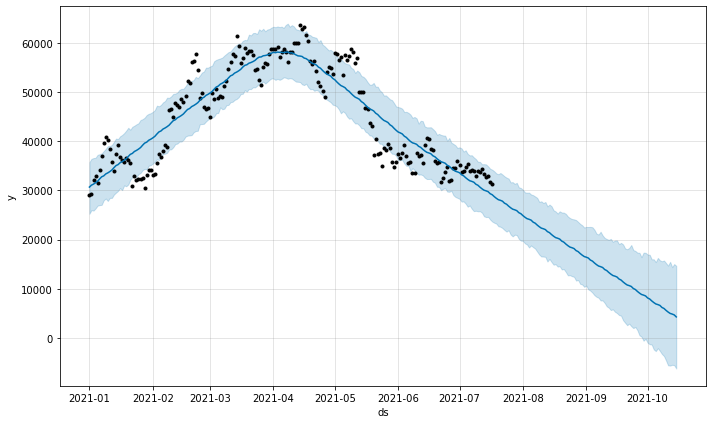

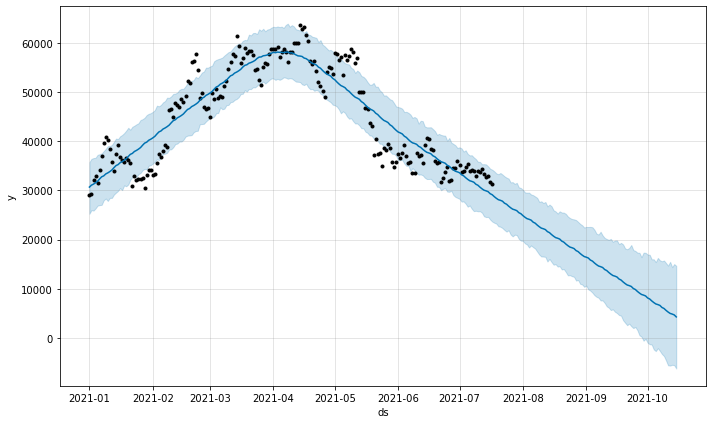

In [7]:
m.plot(forecast)

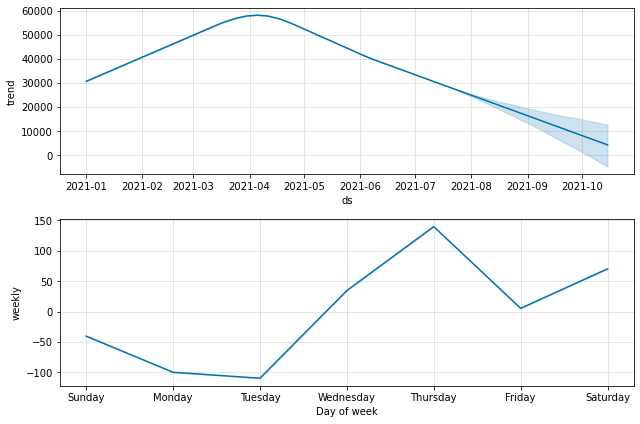

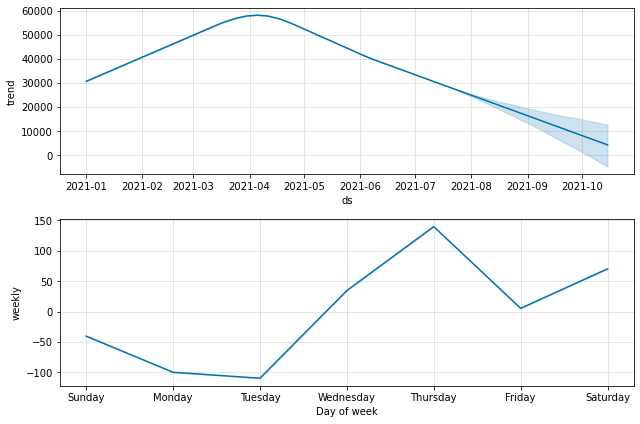

In [8]:
m.plot_components(forecast)